In [1]:
%load_ext autoreload
%autoreload 2

# Movies

In [2]:
import matplotlib.pyplot as plt

from movie_ratings import config
from taskchain.task import Config

In [3]:
config_name = 'movies/20210624.imdb.yaml'
chain = Config(config.TASKS_DIR, config.CONFIGS_DIR / config_name, global_vars=config).chain()
print(chain)

movies              movies:movies              20210624.imdb/movies:movies
duration_histogram  movies:duration_histogram  20210624.imdb/movies:duration_histogram
year_histogram      movies:year_histogram      20210624.imdb/movies:year_histogram
directors           movies:directors           20210624.imdb/movies:directors
genres              movies:genres              20210624.imdb/movies:genres
countries           movies:countries           20210624.imdb/movies:countries
actors              movies:actors              20210624.imdb/movies:actors
selected_directors  movies:selected_directors  20210624.imdb/movies:selected_directors
selected_actors     movies:selected_actors     20210624.imdb/movies:selected_actors


In [4]:
chain.movies.value.sample(5)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0115864,tt0115864,Champions,Champions,1997,1997-05-23,Action,99,USA,English,Peter Gathings Bunche,...,"Louis Mandylor, Danny Trejo, Ken Shamrock, Lee...","William Rockman is a champion ""Terminal Combat...",4.0,256,NaN,NaN,NaN,NaN,10.0,3.0
tt0035082,tt0035082,Ondata d'amore,Moontide,1942,1948-10-02,"Crime, Drama, Film-Noir",94,USA,English,"Archie Mayo, Fritz Lang",...,"Jean Gabin, Ida Lupino, Thomas Mitchell, Claud...","In California, Bobo and his mooching 'pal' Tin...",6.9,1390,NaN,NaN,NaN,NaN,34.0,17.0
tt0075314,tt0075314,Taxi Driver,Taxi Driver,1976,1976-09-24,"Crime, Drama",114,USA,"English, Spanish",Martin Scorsese,...,"Diahnne Abbott, Frank Adu, Victor Argo, Gino A...",A mentally unstable veteran works as a nightti...,8.3,703264,$ 1300000,$ 28262574,$ 28441292,94.0,1178.0,289.0
tt1949548,tt1949548,Heroine,Heroine,2012,2012-09-21,Drama,149,India,Hindi,Madhur Bhandarkar,...,"Kareena Kapoor, Arjun Rampal, Randeep Hooda, S...",A female superstar struggles through the trial...,5.1,3955,NaN,$ 598668,$ 8036853,NaN,39.0,36.0
tt0091264,tt0091264,In the Shadow of Kilimanjaro,In the Shadow of Kilimanjaro,1986,1986-04-30,"Action, Adventure, Drama",97,"UK, Kenya",English,Raju Patel,...,"John Rhys-Davies, Timothy Bottoms, Irene Mirac...","Because of a severe drought in Kenya in 1984, ...",5.2,369,NaN,$ 181410,NaN,NaN,11.0,12.0


In [5]:

chain.movies.value.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

### Top movies

In [7]:
min_votes = 10 ** 3
chain.movies.value\
    .query(f'reviews_from_users > {min_votes}')\
    .sort_values('avg_vote', ascending=False)\
    .head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0111161,tt0111161,Le ali della libertà,The Shawshank Redemption,1994,1995-02-10,Drama,142,USA,English,Frank Darabont,...,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,9.3,2278845,$ 25000000,$ 28699976,$ 28815245,80.0,8232.0,164.0
tt0068646,tt0068646,Il padrino,The Godfather,1972,1972-09-21,"Crime, Drama",175,USA,"English, Italian, Latin",Francis Ford Coppola,...,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,9.2,1572674,$ 6000000,$ 134966411,$ 246120974,100.0,3977.0,253.0
tt0468569,tt0468569,Il cavaliere oscuro,The Dark Knight,2008,2008-07-23,"Action, Crime, Drama",152,"USA, UK","English, Mandarin",Christopher Nolan,...,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...,9.0,2241615,$ 185000000,$ 535234033,$ 1005455211,84.0,6938.0,423.0
tt0071562,tt0071562,Il padrino - Parte II,The Godfather: Part II,1974,1975-09-25,"Crime, Drama",202,USA,"English, Italian, Spanish, Latin, Sicilian",Francis Ford Coppola,...,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,9.0,1098714,$ 13000000,$ 47834595,$ 48035783,90.0,1030.0,178.0
tt0110912,tt0110912,Pulp Fiction,Pulp Fiction,1994,1994-10-28,"Crime, Drama",154,USA,"English, Spanish, French",Quentin Tarantino,...,"Tim Roth, Amanda Plummer, Laura Lovelace, John...","The lives of two mob hitmen, a boxer, a gangst...",8.9,1780147,$ 8000000,$ 107928762,$ 222831817,94.0,3058.0,289.0


In [8]:
chain.duration_histogram.value

<Figure size 432x288 with 0 Axes>

/home/thran/miniconda3/envs/taskchain/lib/python3.8/site-packages/seaborn-0.11.1-py3.8.egg/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

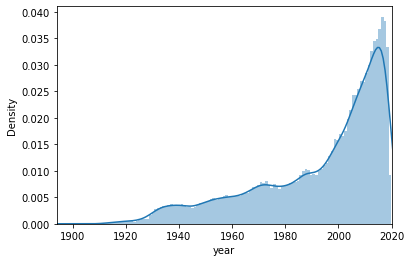

In [12]:
chain.year_histogram.value

## Directors

In [6]:
len(chain.directors.value)

34707

In [8]:
len(chain.selected_directors.value)

770

## Actors

In [19]:
len(chain.actors.value)

417320

In [26]:
len(chain.selected_actors.value)

7802

## Genres

In [10]:
genres = chain.genres.value
for genres, movies in genres.items():
    print(genres, len(movies))

Romance 14128
Biography 2377
Crime 11067
Drama 47110
History 2296
Adventure 7590
Fantasy 3812
War 2242
Mystery 5225
Horror 9557
Western 1583
Comedy 29368
Family 3962
Action 12948
Sci-Fi 3608
Thriller 11388
Sport 1064
Animation 2141
Musical 2041
Music 1689
Film-Noir 663
Adult 2
Documentary 2
Reality-TV 3
News 1


## Countries


In [14]:
countries = chain.countries.value
for country, movies in countries.items():
    print(country, len(movies))

USA 34325
Australia 1181
Germany 3721
Denmark 1026
Italy 5056
Romania 493
France 8311
Sweden 1229
Belgium 1354
Canada 3621
Hungary 642
Russia 1083
Mexico 1173
Norway 639
Japan 3701
Austria 448
UK 7490
Soviet Union 866
Chile 227
India 6373
Switzerland 636
China 1166
Hong Kong 1884
Spain 2731
Czechoslovakia 313
Isle Of Man 12
Brazil 979
Portugal 429
Turkey 1552
Argentina 853
Poland 902
Netherlands 1031
Finland 676
West Germany 1114
Yugoslavia 395
Greece 769
East Germany 74
Egypt 479
Albania 40
Bulgaria 272
Monaco 26
New Zealand 238
Israel 362
Cuba 72
Ireland 476
Philippines 384
South Korea 1299
Liechtenstein 21
Croatia 208
South Africa 330
Puerto Rico 38
Malta 29
Algeria 47
Lebanon 65
Sri Lanka 40
Afghanistan 16
Morocco 78
Kyrgyzstan 14
Singapore 125
Taiwan 419
Senegal 26
Bolivia 25
Bermuda 2
Ukraine 141
Mauritania 5
Iran 744
Thailand 361
Iceland 163
Luxembourg 244
Georgia 60
Venezuela 64
Peru 76
Panama 16
Tunisia 54
Haiti 7
Cameroon 4
Syria 9
Angola 8
Jamaica 13
Ecuador 17
Andorra 3
Col